In [29]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import requests, citipy, api key & datetime
import requests
from citipy import citipy
from config import Weather_api_key
from datetime import datetime

In [30]:
# Create random 1500 longitudes & 1500 latitudes & zip them 
lats = np.random.uniform(low = -90.00, high = 90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [31]:
# Create a coordinates list to carry the zipped coordinates
coordinates = list(lat_lngs)

In [32]:
# Create an empty list to hold the cities
cities = []
# Find the nearest city for each lat-long combination, then add each unique city name to the list, 
#then check the length of the list 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

635

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + Weather_api_key

In [36]:

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | stamsund
City not found. Skipping...
Processing Record 8 of Set 1 | pokhara
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | baruun-urt
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | samarai
Processing Record 13 of Set 1 | tavda
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | viedm

Processing Record 35 of Set 4 | grindavik
Processing Record 36 of Set 4 | sao miguel do araguaia
Processing Record 37 of Set 4 | port-gentil
Processing Record 38 of Set 4 | pimentel
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | chapais
Processing Record 41 of Set 4 | puerto del rosario
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | grand-santi
Processing Record 46 of Set 4 | puerto leguizamo
Processing Record 47 of Set 4 | urgut
Processing Record 48 of Set 4 | pinawa
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | harper
Processing Record 2 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 3 of Set 5 | meulaboh
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | kieta
Processing Record 6 of Set 5 | yanan
City not found. Skip

Processing Record 26 of Set 8 | bilibino
Processing Record 27 of Set 8 | mizpe ramon
City not found. Skipping...
Processing Record 28 of Set 8 | sinkat
City not found. Skipping...
Processing Record 29 of Set 8 | abay
Processing Record 30 of Set 8 | skibbereen
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | zyryanka
Processing Record 34 of Set 8 | coos bay
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | hollister
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | tutayev
Processing Record 40 of Set 8 | berbera
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | east london
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | la macarena
Processing Record 45 of Set 8 | hay river
Processing Record 46 of Set 8 | ellington
Processing Record 47 of Set 8 | hare bay
Processing Record 48 of Se

Processing Record 12 of Set 12 | zvishavane
Processing Record 13 of Set 12 | kavaratti
Processing Record 14 of Set 12 | gurgan
City not found. Skipping...
Processing Record 15 of Set 12 | puerto ayacucho
Processing Record 16 of Set 12 | chipinge
Processing Record 17 of Set 12 | marzuq
Processing Record 18 of Set 12 | dalianwan
Processing Record 19 of Set 12 | lalmanir hat
City not found. Skipping...
Processing Record 20 of Set 12 | tubruq
City not found. Skipping...
Processing Record 21 of Set 12 | nombre de dios
Processing Record 22 of Set 12 | wexford
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | daru
Processing Record 25 of Set 12 | kargasok
Processing Record 26 of Set 12 | astana
Processing Record 27 of Set 12 | kirovskiy
Processing Record 28 of Set 12 | jimenez
Processing Record 29 of Set 12 | fare
Processing Record 30 of Set 12 | gao
Processing Record 31 of Set 12 | santa isabel do rio negro
Processing Record 32 of Set 12 | san marcos
Processing Re

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,75.20,73,90,5.75,US,2021-04-05 02:17:27
1,Padang,-0.9492,100.3543,80.60,89,40,5.75,ID,2021-04-05 02:17:36
2,Cidreira,-30.1811,-50.2056,72.63,76,4,18.63,BR,2021-04-05 02:17:37
3,Comodoro Rivadavia,-45.8667,-67.5000,66.20,52,0,2.30,AR,2021-04-05 02:15:02
4,Ushuaia,-54.8000,-68.3000,39.20,75,40,19.57,AR,2021-04-05 02:17:26
5,Pokhara,28.2333,83.9833,76.75,9,0,0.18,NP,2021-04-05 02:13:16
6,Rikitea,-23.1203,-134.9692,78.12,65,14,17.67,PF,2021-04-05 02:17:38
7,Baruun-Urt,46.6806,113.2792,44.60,35,0,8.86,MN,2021-04-05 02:17:38
8,Margate,51.3813,1.3862,46.99,70,58,5.01,GB,2021-04-05 02:17:39
9,Samarai,-10.6167,150.6667,85.12,71,93,11.16,PG,2021-04-05 02:15:03


In [44]:
new_order_columns = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-04-05 02:17:27,19.7297,-155.0900,75.20,73,90,5.75
1,Padang,ID,2021-04-05 02:17:36,-0.9492,100.3543,80.60,89,40,5.75
2,Cidreira,BR,2021-04-05 02:17:37,-30.1811,-50.2056,72.63,76,4,18.63
3,Comodoro Rivadavia,AR,2021-04-05 02:15:02,-45.8667,-67.5000,66.20,52,0,2.30
4,Ushuaia,AR,2021-04-05 02:17:26,-54.8000,-68.3000,39.20,75,40,19.57


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [48]:
import time

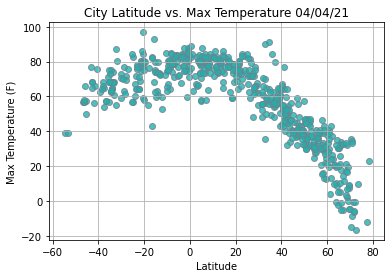

In [50]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="lightseagreen",
            edgecolor="slategray", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

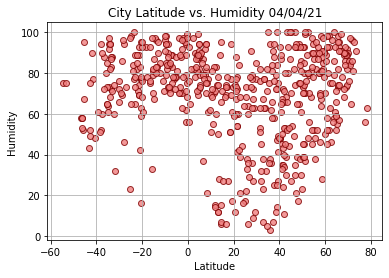

In [52]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity, color="lightcoral",
            edgecolor="maroon", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

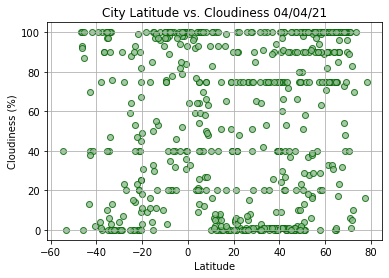

In [53]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness, color="darkseagreen",
            edgecolor="darkgreen", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

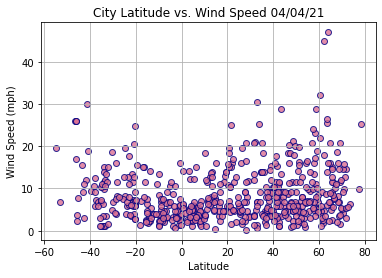

In [54]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats,
            wind_speed, color="palevioletred",
            edgecolor="navy", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()